# K-nearest neighbor

First off, let's do the preprocessing presented in [Data Process](./dataProcess.ipynb):

In [1]:
%%capture

import sys
!{sys.executable} -m pip install nbformat

%run -G ./dataProcess.ipynb

In [31]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

### PCA
From [firstModel](./firstModel.ipynb) we found that PCA with n_components=7 was a reasonable step to take, reducing the model's complexity and reducing the risk of overfitting.

In [32]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# PCA
pca = PCA(n_components=7)
pca.fit(X)
X = pca.transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# oversample
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


### KNN model implementation

In [33]:
# train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)


# Model evaluation

### Train evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00    226597

    accuracy                           1.00    453194
   macro avg       1.00      1.00      1.00    453194
weighted avg       1.00      1.00      1.00    453194



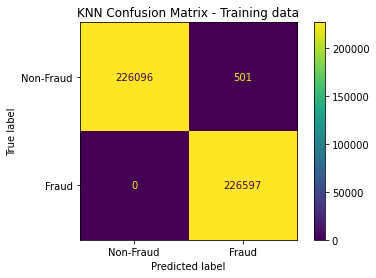

In [39]:
# evaluate model train
print(classification_report(y_train, knn.predict(X_train)))
cm = confusion_matrix(y_train, knn.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot()
plt.title('KNN Confusion Matrix - Training data')
plt.show()

### Test evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.26      0.77      0.39        90

    accuracy                           1.00     56746
   macro avg       0.63      0.88      0.69     56746
weighted avg       1.00      1.00      1.00     56746



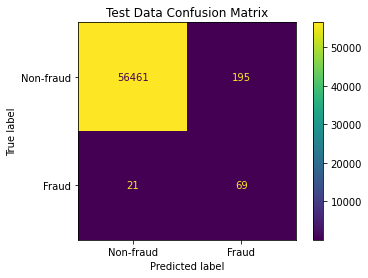

In [38]:
# evaluate model
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot()
plt.title('Test Data Confusion Matrix')
plt.show()

### Conclusions

Observing the test data (the training data was not that informative), the important metric recall was lower than with the logistic regression (0.77 for KNN, 0.86 for logistic regression), meaning the KNN model was worse for predicting fraudulent transactions. However, a higher precision was observed (0.26 vs 0.04), leading to a higher f1-score for the KNN-model (0.39 vs 0.08 for the logistic regression).